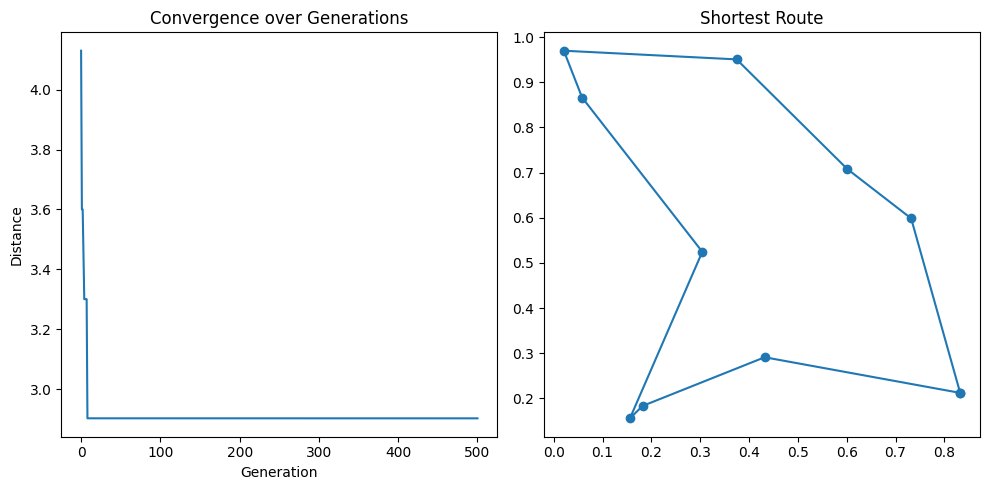

Best Route: [6, 1, 4, 0, 5, 3, 8, 2, 7, 9]
Shortest Distance: 2.903


In [1]:
# Program:
import numpy as np
import random
import matplotlib.pyplot as plt

# Distance matrix: 10 random cities
np.random.seed(42)
cities = np.random.rand(10, 2)

def total_distance(route):
    """Calculates the total distance of a given route."""
    # Calculate distance between consecutive cities in the route, including returning to the start
    return sum(np.linalg.norm(cities[route[i]] - cities[route[i-1]]) for i in range(len(route)))

# Initialize population
def initial_population(size, n_cities):
    """Generates an initial population of random routes."""
    # Each route is a permutation of city indices
    return [random.sample(range(n_cities), n_cities) for _ in range(size)]

# Fitness: Inverse of distance
def fitness(route):
    """Calculates the fitness of a route as the inverse of its total distance."""
    dist = total_distance(route)
    # Avoid division by zero in case of a zero distance (unlikely in TSP with distinct cities)
    if dist == 0:
        return float('inf') # Or a large number
    return 1 / dist

# Selection: Tournament
def select(pop, k=3):
    """Selects an individual from the population using tournament selection."""
    # Randomly select k individuals from the population
    selected = random.sample(pop, k)
    # Return the individual with the highest fitness (lowest distance)
    return max(selected, key=fitness)

# Ordered Crossover (OX)
def crossover(parent1, parent2):
    """Performs ordered crossover (OX) on two parent routes."""
    size = len(parent1)
    # Select a random start and end point for the crossover segment
    start, end = sorted(random.sample(range(size), 2))

    # Copy the segment from parent1
    middle = parent1[start:end]

    # Fill the rest of the child route with cities from parent2 in their original order,
    # skipping cities already in the middle segment
    rest = [city for city in parent2 if city not in middle]

    # Combine the 'rest' parts and the 'middle' segment to form the child
    child = rest[:start] + middle + rest[start:]
    return child

# Mutation: swap
def mutate(route, rate=0.01):
    """Performs swap mutation on a route with a given probability rate."""
    mutated_route = list(route) # Create a mutable copy
    for i in range(len(mutated_route)):
        # For each city, potentially swap it with another city
        if random.random() < rate:
            j = random.randint(0, len(mutated_route) - 1)
            # Swap the cities at indices i and j
            mutated_route[i], mutated_route[j] = mutated_route[j], mutated_route[i]
    return mutated_route

# Genetic Algorithm
def genetic_algorithm(n_generations=500, pop_size=100):
    """Runs the genetic algorithm to find the shortest route."""
    n_cities = len(cities)
    # Initialize the population
    population = initial_population(pop_size, n_cities)

    # Find the best route and its distance in the initial population
    # min is used with key=total_distance because we want the minimum distance (highest fitness)
    best_route = min(population, key=total_distance)
    best_dist = total_distance(best_route)

    # Keep track of the best distance over generations
    history = [best_dist]

    # Main genetic algorithm loop
    for _ in range(n_generations):
        new_population = []
        # Generate new individuals until the new population reaches the desired size
        for _ in range(pop_size):
            # Select two parents using tournament selection
            p1 = select(population)
            p2 = select(population)
            # Perform crossover to create a child
            child = crossover(p1, p2)
            # Perform mutation on the child
            child = mutate(child)
            # Add the new child to the next generation
            new_population.append(child)

        # Replace the current population with the new population
        population = new_population

        # Find the current best route and its distance in the new population
        current_best = min(population, key=total_distance)
        dist = total_distance(current_best)

        # Update the overall best route and distance if the current best is better
        if dist < best_dist:
            best_route = current_best
            best_dist = dist

        # Record the best distance for this generation
        history.append(best_dist)

    # Return the best route found, its distance, and the history of best distances
    return best_route, best_dist, history

# Run GA
best_route, best_distance, history = genetic_algorithm()

# Plot result
plt.figure(figsize=(10, 5))

# Plot the convergence (distance over generations)
plt.subplot(1, 2, 1)
plt.plot(history)
plt.title("Convergence over Generations")
plt.xlabel("Generation")
plt.ylabel("Distance")

# Plot the shortest route found
plt.subplot(1, 2, 2)
# Prepare cities for plotting in the order of the best route, closing the loop
ordered_cities = np.array([cities[i] for i in best_route + [best_route[0]]])
plt.plot(ordered_cities[:, 0], ordered_cities[:, 1], marker='o') # Plot cities as points and lines
plt.title("Shortest Route")

plt.tight_layout() # Adjust layout to prevent overlap
plt.show() # Display the plots

# Print the best route and its distance
print("Best Route:", best_route)
print("Shortest Distance:", round(best_distance, 3))